In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version
from sklearn.linear_model import LinearRegression

In [7]:
data = pd.read_csv("final_merged_phq1_9.csv")
phqs = data[["target01", "target02", "target03", "target04", "target05", "target06", "target07", "target08",
                 "target09"]]
phq_sum = phqs.sum(axis=1)
phq_sum_binary = (phq_sum >= 10).astype(int)

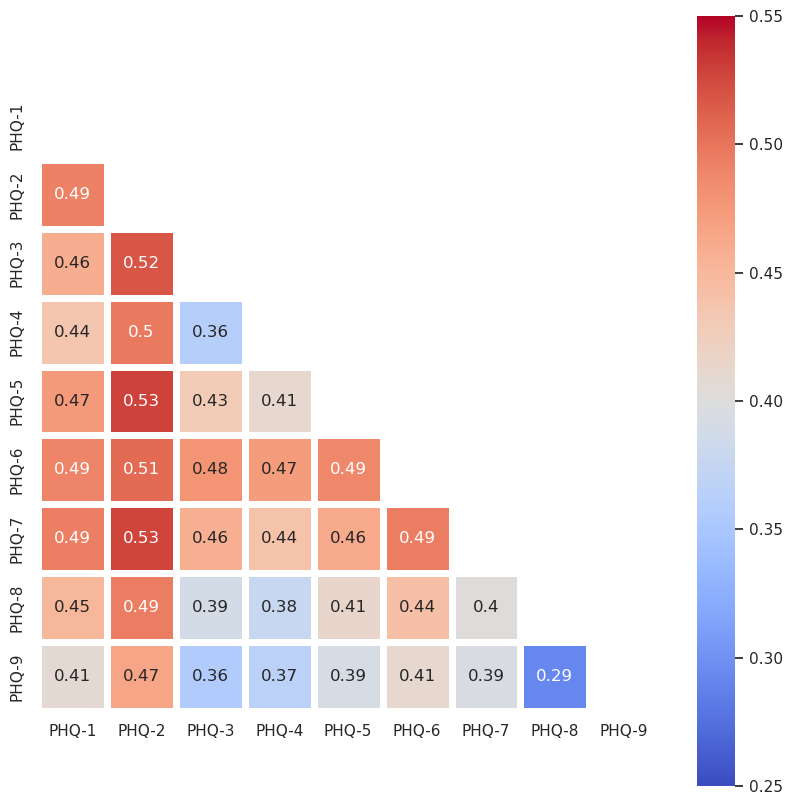

In [8]:
heatmap = pd.DataFrame(0.0,index=np.arange(9), columns=np.arange(9))
for i in range(0, 9):
    for j in range(i+1, 9):
        
        #print("This is PHQ-",i+1, j+1)
        phqs_2 = phqs.iloc[:,np.r_[i,j]]
        #print(phqs_2)
        
        input_train, input_test, output_train, output_test = train_test_split(phqs_2,phq_sum_binary,
                                                                              test_size=0.3,random_state=77, 
                                                                              shuffle=True)
        
        reg = LinearRegression().fit(input_train, output_train)
        pred = reg.predict(input_test)
        mse = mean_squared_error(output_test, pred)
        mae = mean_absolute_error(output_test, pred)
        r2 = r2_score(output_test, pred)

        heatmap. loc[i, j] = r2
        heatmap. loc[j, i] = r2

names = ['PHQ-1', 'PHQ-2', 'PHQ-3', 'PHQ-4', 'PHQ-5', 'PHQ-6', 'PHQ-7', 'PHQ-8', 'PHQ-9']
heatmap.columns = names
heatmap.index = names

#rownames(df) = c("A", "B", "C")
sns.set_theme(style="white")
# Generate the correlation matrix using pandas
#corr = heatmap.corr()
fig, ax = plt.subplots(figsize=(10, 10))
# Set a triangular mask
mask = np.triu(np.ones_like(heatmap, dtype=bool))
sns.heatmap(heatmap, mask=mask, annot=True, vmin=0.25, vmax=0.55, center=0.4, fmt='.2',
                square=True, linewidths=5, cmap='coolwarm')
plt.show()